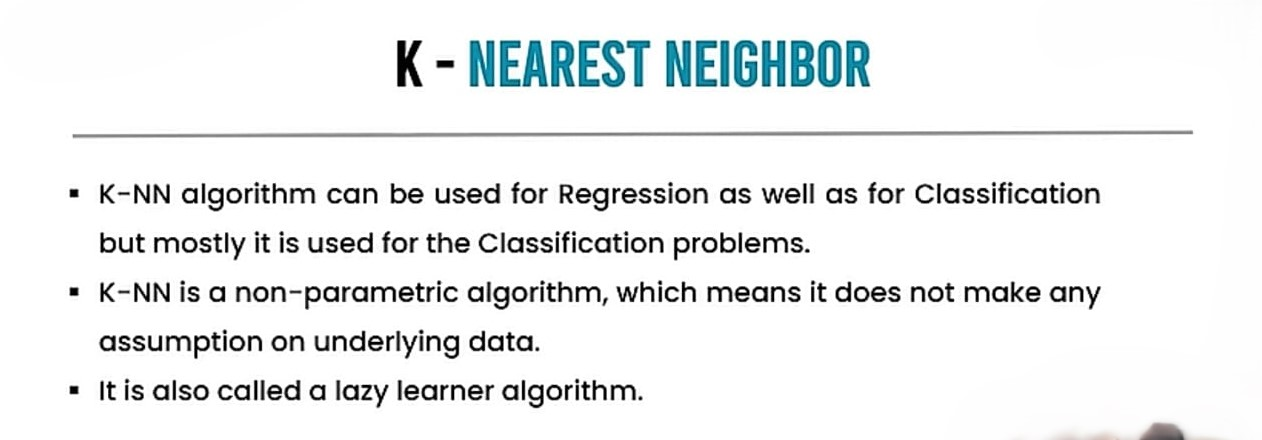

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

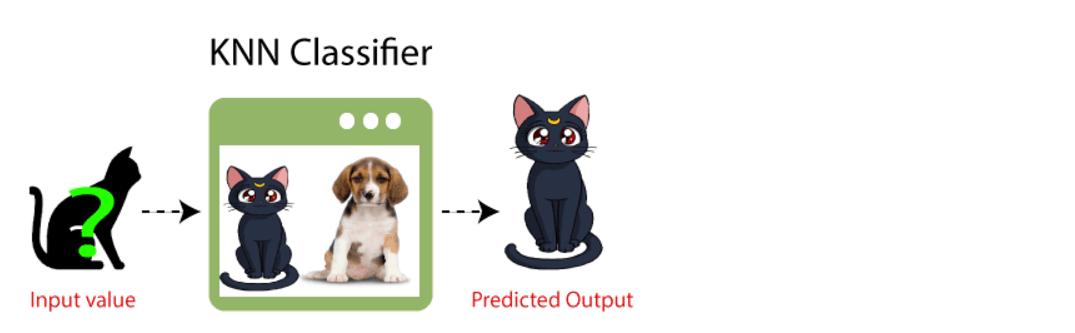

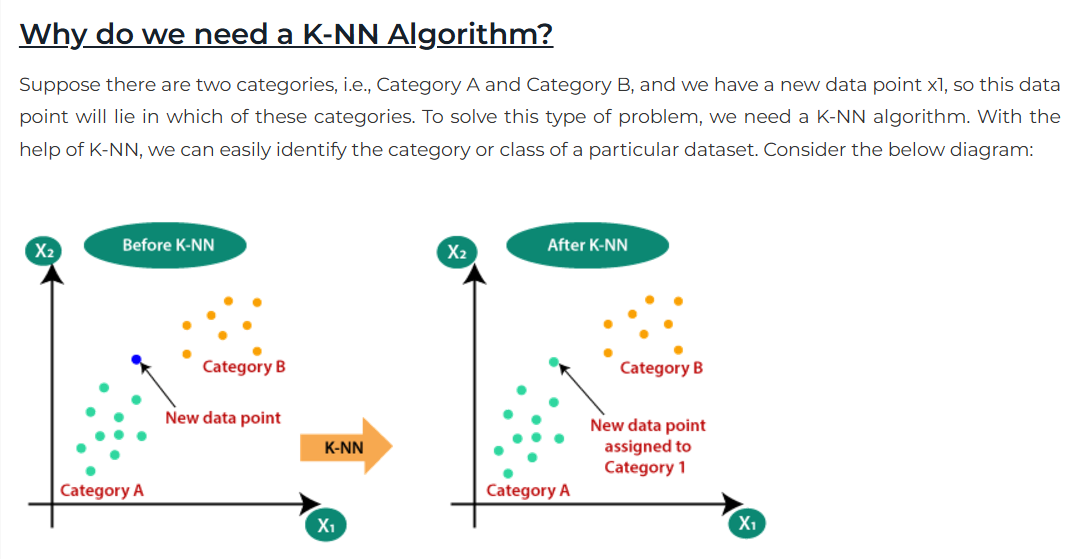

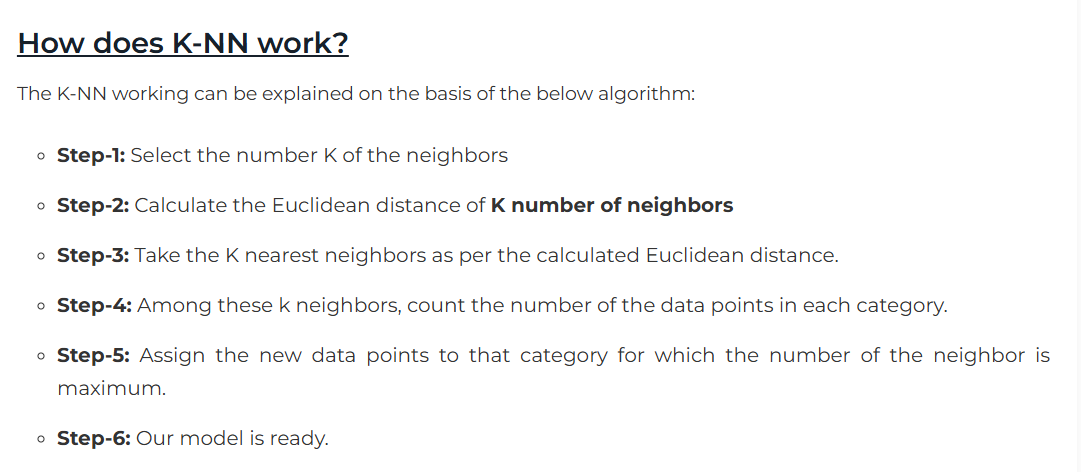

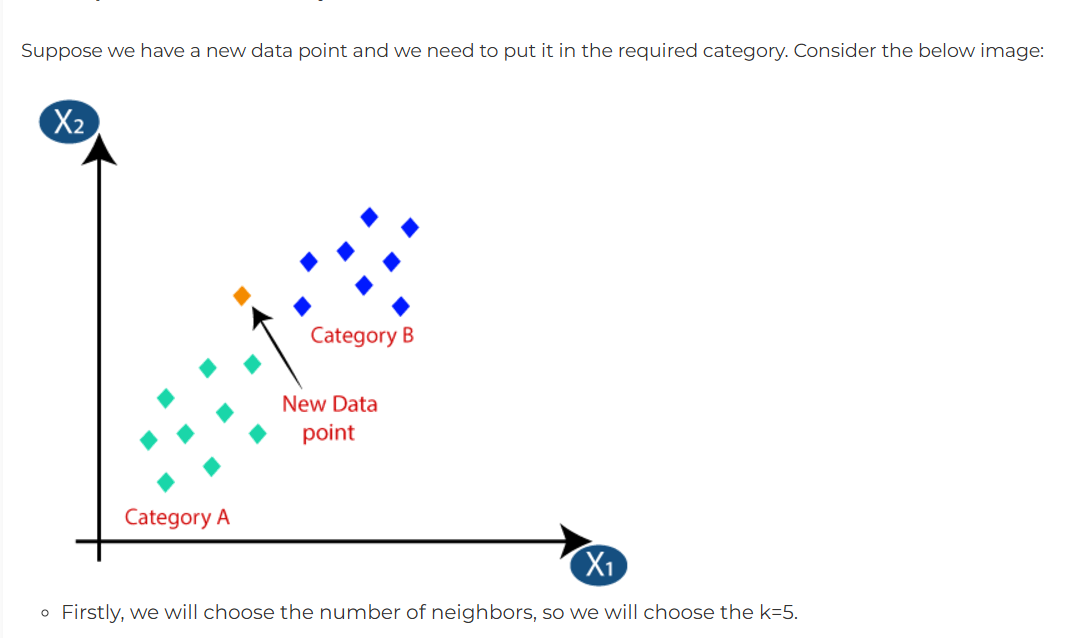

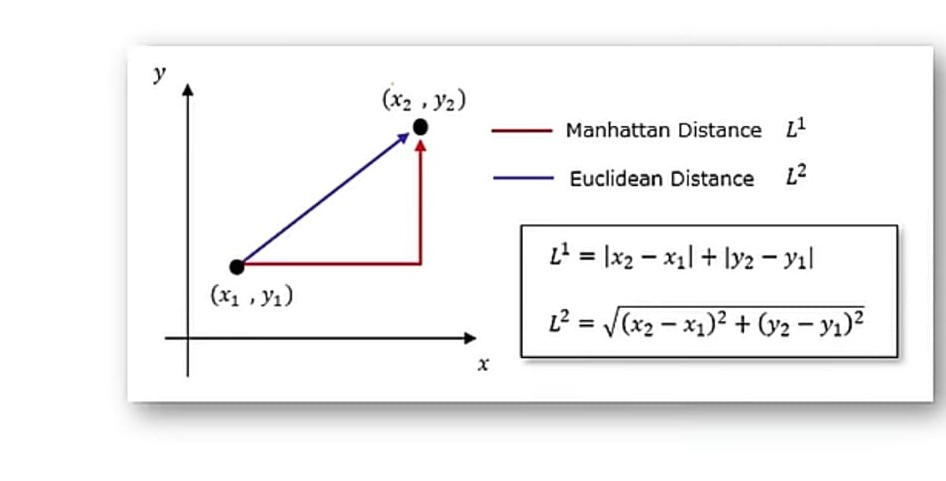

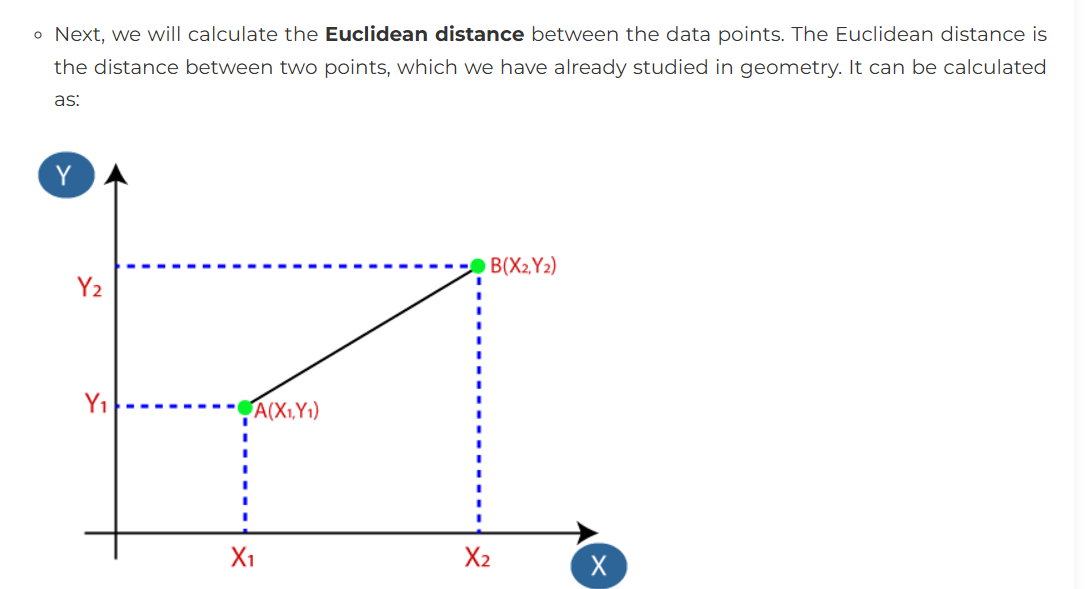

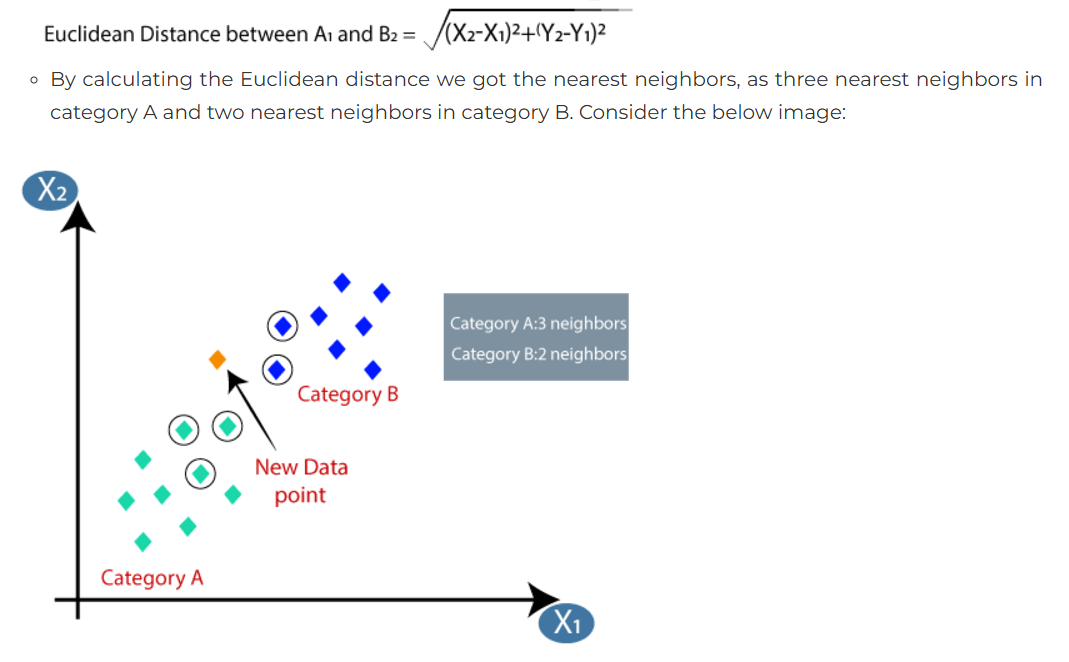

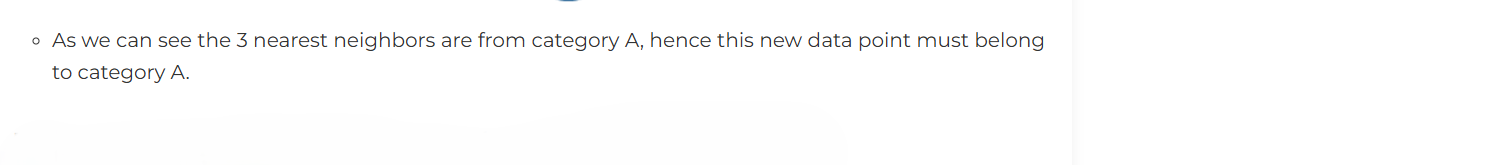

### K-NN (PRACTICAL)

#### Aim of the Project
#### To build a K-Nearest Neighbors (KNN) classification model to predict whether a customer will purchase a product based on their age and estimated salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dataset = pd.read_csv('purchased_data.csv')
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [65]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [66]:
x= dataset.iloc[:,:-1]
y= dataset['Purchased']

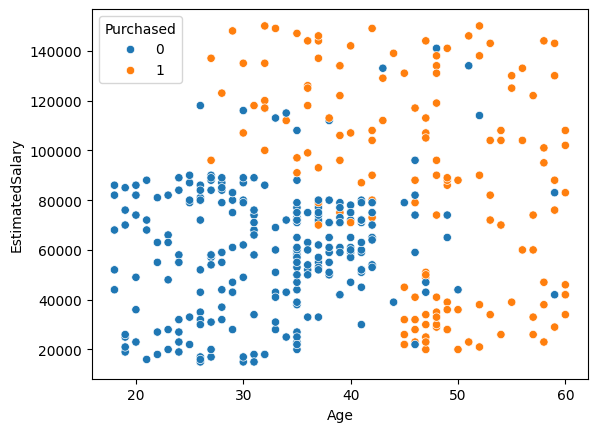

In [7]:
# checking distribution of data
sns.scatterplot(x='Age',y='EstimatedSalary',data=dataset, hue='Purchased')
plt.show()

In [8]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [9]:
# converting into dataframe
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [10]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
knn.score(x_test,y_test)*100

92.5

In [48]:
# change the neighbours value to observe the difference in score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
knn.score(x_test,y_test)*100

91.25

In [50]:
# no major difference observed 

In [51]:
# now checking the model is overfitted or not
knn.score(x_train,y_train)*100

92.5

In [45]:
# there is differenve between training and testing accuracy so, we have to change the neighbours value to make a perfect model.

In [47]:
# apply loop to get accurate range for our model
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=5)
    knn1.fit(x_train,y_train)
    print(i,knn.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)


1 90.9375 92.5
2 90.9375 92.5
3 90.9375 92.5
4 90.9375 92.5
5 90.9375 92.5
6 90.9375 92.5
7 90.9375 92.5
8 90.9375 92.5
9 90.9375 92.5
10 90.9375 92.5
11 90.9375 92.5
12 90.9375 92.5
13 90.9375 92.5
14 90.9375 92.5
15 90.9375 92.5
16 90.9375 92.5
17 90.9375 92.5
18 90.9375 92.5
19 90.9375 92.5
20 90.9375 92.5
21 90.9375 92.5
22 90.9375 92.5
23 90.9375 92.5
24 90.9375 92.5
25 90.9375 92.5
26 90.9375 92.5
27 90.9375 92.5
28 90.9375 92.5
29 90.9375 92.5


In [52]:
# apply knn value = 3 

In [53]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [55]:
knn.predict([[1.179110,-1.460681]])

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [56]:
knn.predict([[-1.781797,-1.490046]])

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
from mlxtend.plotting import plot_decision_regions

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


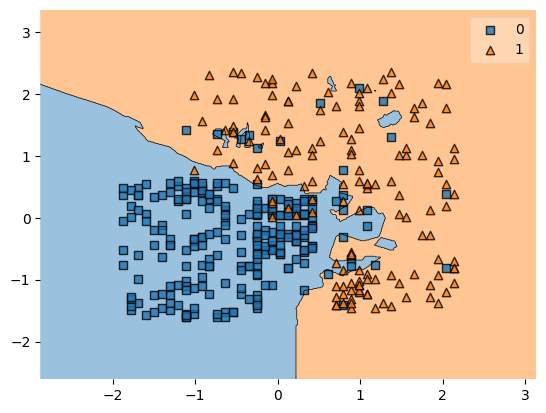

In [58]:
 plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()

### Advantages of KNN Algorithm:
* It is simple to implement.
* It is robust to the noisy training data
* It can be more effective if the training data is large.

### Disadvantages of KNN Algorithm:
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.